# **Coffee Case Study - Using Machine Learing to make informed business decisions **




# The Scenario

RR Diner Coffee needs help making an informed decision.

RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

My task is to help RR Diner Coffee to use data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

My first job, then, is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, me and my team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

I have also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

My intital thought is: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, I will advise RR Diner Coffee to strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, I will inform then not to strike the deal and the Hidden Farm coffee will remain in legends only. I chose 70% is an arbritary percent which is a reasonable threshold. 

To solve the problem, then, I will build a decision tree to implement a classification solution as well as use Random Forest classification. 


-------------------------------
Methodology

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Cleaning the data
- Create features

**3. Exploratory Data Analysis**
- Using visualization to discover trends and patterns
- Apply hypothesis testing 
- Train/test split
  
**4. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**5. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**6. Random Forest** 
- Import necessary modules
- Model
- Revise conclusion

**7. Conclusion and Insights**
- Summary of decision based on ML models
- Key insights gained from data

**8. Next Steps**
- Recommendation for improvements

# 0. Overview

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck. 

# 1. Sourcing and loading
## 1a. Import Packages

In [45]:
#Needed to install on local machine
!pip install pydotplus


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [46]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

## 1b. Load data 

In [47]:
# Read in the data to a variable called coffeeData
RRcoffee = pd.read_csv('RRDinerCoffeeData.csv')

## 1c. Explore the data

Exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

In [48]:
# Call head() on your data 
RRcoffee.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [49]:
RRcoffee.head(2)

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN


In [50]:
# Call .shape to see shape of data
RRcoffee.shape

(702, 9)

In [51]:
# Call info() on data
RRcoffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [52]:
# Call describe() on data to get the relevant summary statistics for the data 
RRcoffee.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


## Observations:

## Customer Salary
- Average salary is $43,819.
- Half of the customers make more than $41,975 and the other half make less than this.

## Spent per week
- The average that customers spent per week is $32.
- Half of customers spent more than $36 per week and the other half spent less than $36 per week. 

## Spent per month
- Average spent per customer per month is $107.
- Half of customers spent less than $113 while the other half spent less than $113 per month.

## Distance 
- Average distance that a customer lives from coffee diner is 4.5 miles
- Half of customers live less than 4.1 miles from RR coffee diner while the other half live further than 4.1 miles. 

## Online
- Average number of RR coffee diner items purchased online is .53
- Half of customers purchased more than 1 item online.

## Decision
- Only 474 customers out of the 702 in the dataset responded to the survey on whether they would purchase hidden farms coffee.
- On average 63% of customers would decide to buy hidden farms coffee.


### Age
- 702 customers are in this data set.
- Customers average age is 34.
- Half of the customers are below age of 28 and the other half are above the age of 28.
- Youngest customers are 16 and oldest are 90.

### Number of coffee bags per year
- On average customers buy 2.7 bags of coffee per year from RR coffee diner.
- Half of all customers in survey buy more than 3 bags of coffee per year. 

## Potential EDA questions:
- Is there a correlation between customer salary and decision to buy hidden farms coffee?
- Is there a correlation between customer age and decision to buy hidden farms coffee?
- Is there a correlation between distance and decision to buy hidden farms coffee?
- Is there a correlation between online and decsision to buy hidden farms coffee?
- Correlation between salary and $ spent per week/month?

In [53]:
#Check for missing data in dataset
RRcoffee.isnull().sum()

Age                          0
Gender                       0
num_coffeeBags_per_year      0
spent_week                   0
spent_month                  0
SlrAY                        0
Distance                     0
Online                       0
Decision                   228
dtype: int64

## Insights:
- 228 people did not provide an answer to whether they would purchase coffee from Hidden farms.
- This represents 32% missing data for a target feature 'decision'.
- I will either have to drop these missing values or impute them. 

# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. I need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity. 

First, I will change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [54]:
# Check out the names of the data's columns 
RRcoffee.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [55]:
# Make the relevant name changes to spent_week and spent_per_week.
RRcoffee.rename(columns={'spent_week':'spent_last_week','spent_month':'spent_last_month', 'SlrAY': 'salary'}, inplace=True)

In [56]:
# Check out the column names
RRcoffee.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [57]:
# Let's have a closer look at the gender column. Its values need cleaning.
RRcoffee['Gender'].value_counts()

Gender
Male      355
Female    340
female      1
F           1
f           1
FEMALE      1
MALE        1
male        1
M           1
Name: count, dtype: int64

## Observation:
- Data is messy and inconsistent providing several values. I need to standarize this!

In [58]:
# See the gender column's unique values 
RRcoffee['Gender'].unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

There are a bunch of inconsistency here.

I can use replace() to make the values of the `gender` column just `Female` and `Male`.

In [59]:
# Replace all alternate values for the Female entry with 'Female'
RRcoffee.replace(['female','F','f ','FEMALE'], 'Female', inplace=True)

In [60]:
# Check out the unique values for the 'gender' column
RRcoffee['Gender'].value_counts() 

Gender
Male      355
Female    344
MALE        1
male        1
M           1
Name: count, dtype: int64

In [61]:
# Replace all alternate values with "Male"
RRcoffee.replace(['male','M','MALE'], 'Male', inplace=True)

In [62]:
# Let's check the unique values of the column "gender"
RRcoffee['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [63]:
# Check out the unique values of the column 'Decision'
RRcoffee['Decision'].unique()

array([ 1., nan,  0.])

In [64]:
RRcoffee['Decision'].value_counts()

Decision
1.0    303
0.0    171
Name: count, dtype: int64

In [65]:
#Checking for Null values
RRcoffee['Decision'].isnull().sum()

228

## Observation:
- 228 out of the 702 customers did not provide a response to the survey.

Here I will replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [66]:
# Replace 1.0 and 0.0 by 'Yes' and 'No'
RRcoffee['Decision'].replace([1.0], 'YES', inplace=True)
RRcoffee['Decision'].replace([0.0], 'NO', inplace=True)

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_26407/102919536.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  RRcoffee['Decision'].replace([1.0], 'YES', inplace=True)


In [67]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
RRcoffee['Decision'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [68]:
RRcoffee['Decision'].value_counts()

Decision
YES    303
NO     171
Name: count, dtype: int64

In [69]:
yes = 303
no = 171

total= yes+no

# Percent of customers that responded yes to buying hidden farms coffee
print(yes/total)

0.6392405063291139


## Observation:
- Approximately 64% of customers who responded to the survey said they would purchase.
 

## Feature Engineering:
- Create feature that classifies customers as 'low spenders', 'medium spenders' and 'high spenders' based on amount spent per week or month quantiles!
- Use imputation to fill in missing decision values?
- Use EDA to find a correlation between customer spending patterns and whether or not they would purchase hidden farms coffess.

In [70]:
RRcoffee.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000


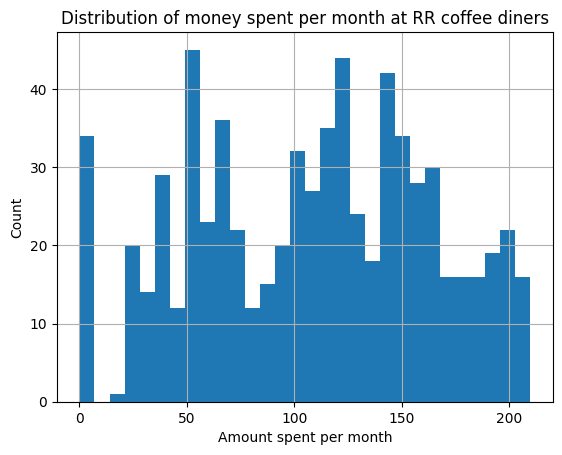

In [71]:
RRcoffee['spent_last_month'].hist(bins=30)

plt.xlabel('Amount spent per month')
plt.ylabel('Count')
plt.title('Distribution of money spent per month at RR coffee diners')
plt.show()

## Observations:
- Amount spent per month has a normal a relatively normal distribution.


## Feature Engineering: Creating a spending category that lables customers as 'low spender', 'medium spender' and 'high spender'. 

In [72]:
# Creating spender categorization using mean and standard deviation
mean = 107.92
std = 55.34

def categorize_spender(amount):
    if amount < mean - std / 2:
        return 'low spender'
    elif amount > mean + std / 2:
        return 'high spender'
    else:
        return 'medium spender'

RRcoffee['spending_category_by_month'] = RRcoffee['spent_last_month'].apply(categorize_spender)

print(RRcoffee.head(10))


   Age  Gender  num_coffeeBags_per_year  spent_last_week  spent_last_month  \
0   36  Female                        0               24                73   
1   24    Male                        0               44               164   
2   24    Male                        0               39               119   
3   20    Male                        0               30               107   
4   24  Female                        0               20                36   
5   20  Female                        0               23                28   
6   34  Female                        0               55               202   
7   24  Female                        0               20                34   
8   27    Male                        0               49               145   
9   16  Female                        0               55               176   

   salary  Distance  Online Decision spending_category_by_month  
0   42789  0.003168       0      YES                low spender  
1   74035

In [73]:
RRcoffee.tail()

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Decision,spending_category_by_month
697,45,Female,5,61,201,80260,10.476341,0,YES,high spender
698,54,Male,5,44,116,44077,10.693889,1,NO,medium spender
699,63,Male,5,33,117,43081,10.755194,1,NO,medium spender
700,20,Female,5,41,159,12522,10.871566,0,NaN,high spender
701,90,Male,5,39,170,15098,10.891566,0,YES,high spender


## 2b. Train/test split
To execute the train/test split properly, we need to do five things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of coffeeData with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
5. Create dummy variables to deal with categorical inputs

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [74]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData
NOPrediction = RRcoffee.dropna(subset=['Decision'])
NOPrediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000
mean,35.417722,2.590717,32.592827,106.727848,44731.892405,5.102898,0.512658
std,13.604135,1.585211,15.758109,56.101085,25567.674430,3.354891,0.500368
min,16.000000,0.000000,0.000000,0.000000,3150.000000,0.003168,0.000000
25%,25.000000,1.000000,24.000000,60.000000,27284.250000,2.077965,0.000000
50%,29.000000,3.000000,35.000000,113.500000,42791.500000,4.832168,1.000000
75%,49.000000,4.000000,43.000000,150.000000,61621.750000,7.869086,1.000000
max,90.000000,5.000000,62.000000,210.000000,172658.000000,10.986203,1.000000


### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

In [75]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week
NOPrediction['spent_last_week'].value_counts()


spent_last_week
0     57
40    26
34    18
41    18
37    17
38    17
35    17
39    16
32    15
45    12
25    12
29    11
44    11
22    10
51    10
31    10
33    10
43     9
21     9
24     9
19     9
48     9
42     9
30     8
36     8
23     8
49     8
26     8
55     8
20     7
46     7
58     7
28     7
47     6
27     6
18     6
53     5
54     5
52     5
17     4
50     4
61     3
62     3
59     3
57     2
60     2
16     2
56     1
Name: count, dtype: int64

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_26407/2298579388.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decision', y='spent_last_week', palette= ['#4daf4a', '#e41a1c'],data=NOPrediction)


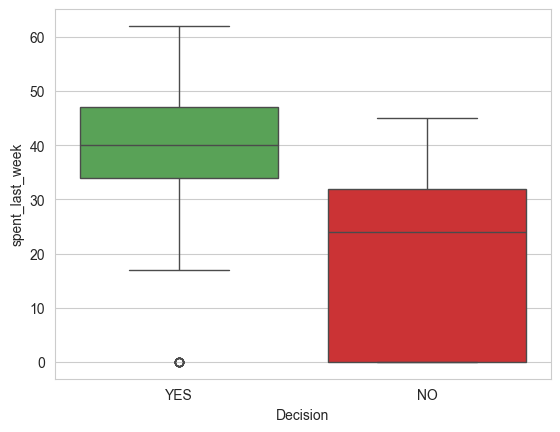

In [168]:
sns.boxplot(x='Decision', y='spent_last_week', palette= ['#4daf4a', '#e41a1c'],data=NOPrediction)

plt.show()

## Observations:

- Over 75% of customers who responded YES spent more than $30 week before survey.

- Over 75% of customers who responded NO spent less than $35 week before survey. 

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_26407/4106157541.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Decision', y='spent_last_month',palette= ['#4daf4a', '#e41a1c'], data=NOPrediction)


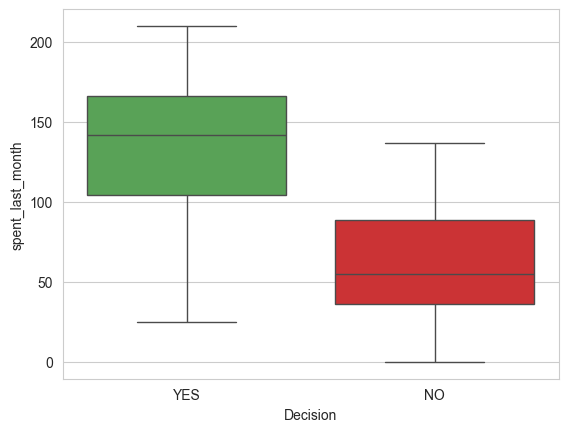

In [167]:
sns.boxplot(x='Decision', y='spent_last_month',palette= ['#4daf4a', '#e41a1c'], data=NOPrediction)

plt.show()

## Obervations:
- The customers who responded YES to survey spent more the week before the survey than those who responded NO.
- 50% of the customers who responded YES to the survey spent more the previous month than the max spenders of customers who said NO.
- There appears to be a clear correlation between money spent and responding YES on the survey.   

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_26407/1482026756.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Distance', y='Decision',palette= ['#4daf4a', '#e41a1c'],data=NOPrediction)


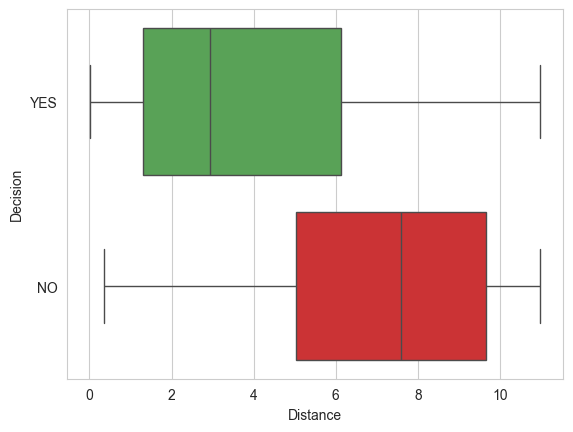

In [166]:
sns.boxplot(x='Distance', y='Decision',palette= ['#4daf4a', '#e41a1c'],data=NOPrediction)

plt.show()

## Observations:
- Over 50% of customers who responded YES live 3 miles or less from a RR Diner. 

- Over 75% customers who responded NO live more than 5 miles from RR Diner. 

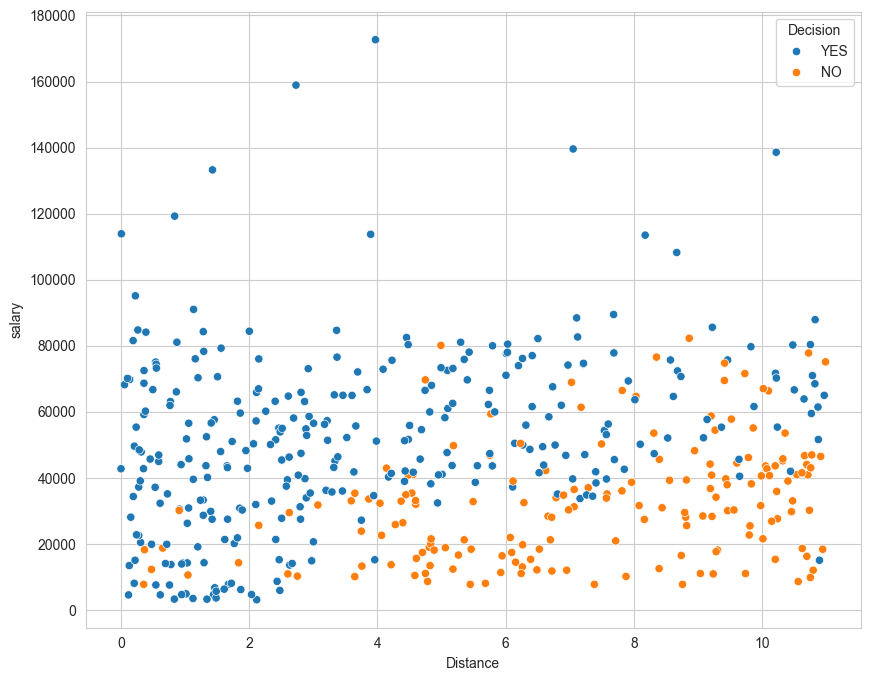

In [94]:
# Is there a correlation between Salary, Distance and Decision?

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
sns.scatterplot(x='Distance', y='salary', hue='Decision', data=NOPrediction)

plt.yticks(np.arange(0, 200000, 20000))  # Customize range and step size
plt.show()

## Observations:
- Distance seems to be a key factor in indicating whether a customer responded YES or No on the survey. 
- The majority of customers who are less than 2 miles from RR coffee diner responded YES regardless of salary to buying hidden farms coffee. 
- Additionally customers were far more likely to respond NO on survey if they lived more than 4 miles away and had a salary of less than 40k. 

## Comment:
- Perhaps this information can be used to impute missing values for customers who did not respond to the survey. 
- I can create a function to check the distance a customer lives from RR coffee diner and impute their decision as YES or NO depending on distribution of customers who did respond. 
- Can I use clustering for this???

/var/folders/yw/y4pg_jgd1337cpj1cjwrm82c0000gn/T/ipykernel_26407/4014981218.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Decision', y='Online', data=NOPrediction, palette=['#4daf4a', '#e41a1c'])


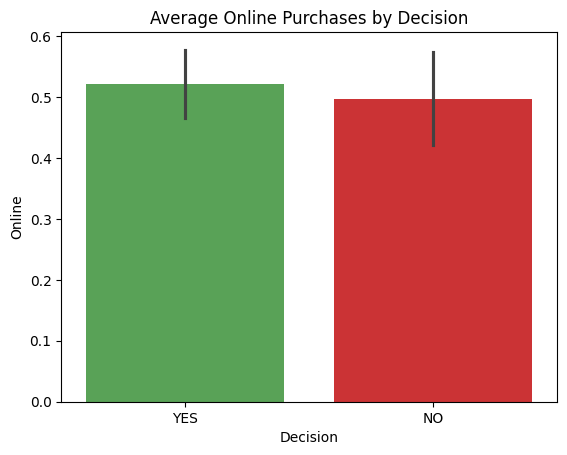

In [91]:
# Is there a correlation between number of products purchased Online and Decision?


# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
sns.barplot(x='Decision', y='Online', data=NOPrediction, palette=['#4daf4a', '#e41a1c'])

plt.title("Average Online Purchases by Decision")
plt.show()

## Observations:
- On average people who purchased more coffee online were more likely to say YES to buying hidden farms coffee.
- Is this difference statistically significant or due to chance?

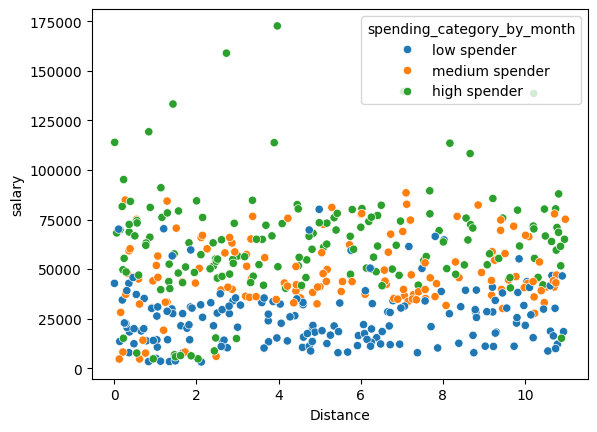

In [40]:
# Is there a correlation between Salary and Decision?


# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
sns.scatterplot(x='Distance', y='salary', hue='spending_category_by_month', data=NOPrediction)

plt.show()

## Observations:
- Distance seems to be a key factor in indicating whether a customer responded YES or No on the survey. 

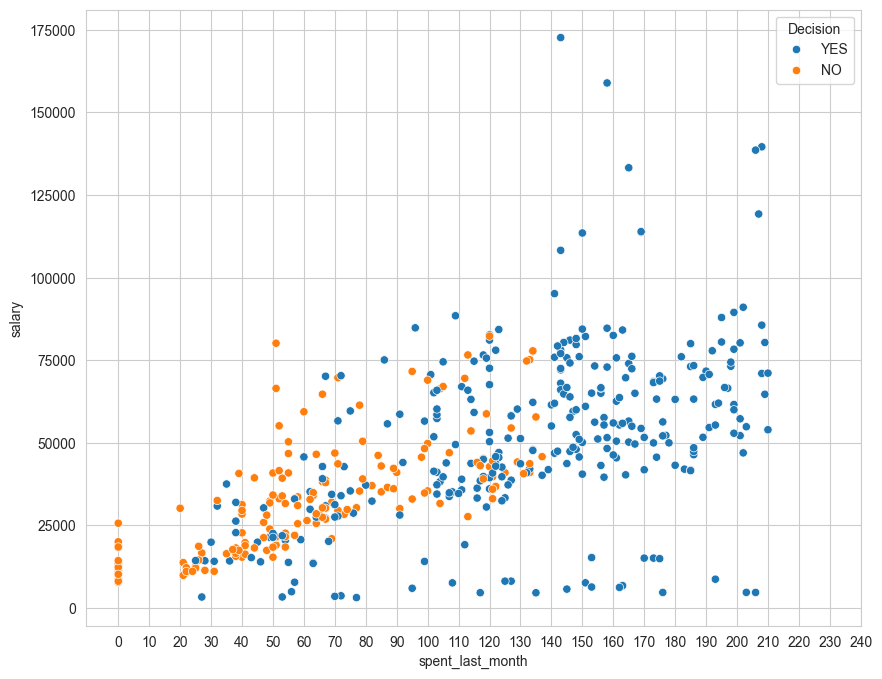

In [103]:
# Is there a correlation between Salary, spent last week and Decision?

#sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))



# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
sns.scatterplot(x='spent_last_month', y='salary', hue='Decision', data=NOPrediction)


plt.xticks(np.arange(0, 250, 10))  # Customize range and step size
plt.show()

## Observations:
- Every customer who responded YES to the survey makes over $75,000 per year and spent more than $150 the month before the survey. 
- Every single customer who spent more than $140 the week prior to survey answered YES to buying hidden farms coffee. 
- Majority of customers who spent less than $60 the week before survey answered NO to buying hidden farms coffee. 



## Comment:
- This information could also be used to impute null values of customers who did not respond to survey. 

## Exploring: Gender, Salary and amount spent last month.


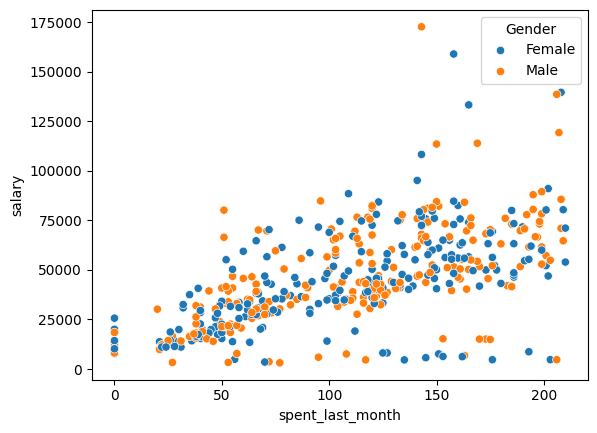

In [37]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
sns.scatterplot(x='spent_last_month', y='salary', hue='Gender', data=NOPrediction)

plt.show()

## Observations:
- No clear correlation between Genders, Salary and amount spent last month.

In [100]:
RRcoffee.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision',
       'spending_category_by_month'],
      dtype='object')

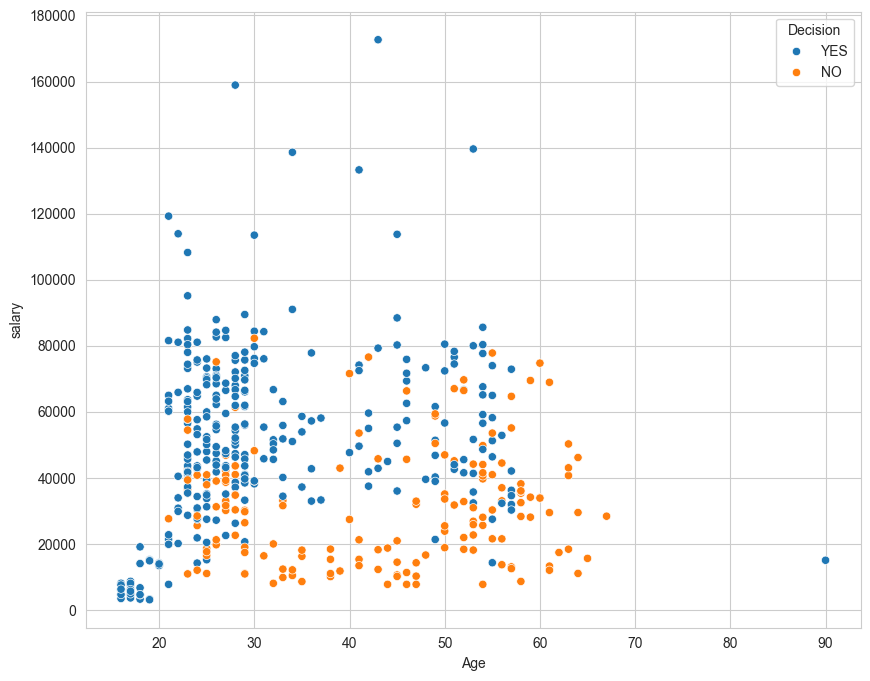

In [101]:
# Is there a correlation between Salary, Distance and Decision?

sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
sns.scatterplot(x='Age', y='salary', hue='Decision', data=NOPrediction)

plt.yticks(np.arange(0, 200000, 20000))  # Customize range and step size
plt.show()

## Observations:
- Customers between ages 20-30 who make more than 40k a year were far more likely to answer YES to survey on buying hidden farm coffee. 
- Regardless of age, customers who make 20k or less are far more likley to answer NO to buying hidden farm coffee. 

## Summary of EDA:

- From this scatterplot I can conclude that customers who are at a closer distance tend to spend more and are also more likely to have said chosen 'Yes' as their decision. There is a clear pattern that has distance increases so does the frequency of 'No' as a response and the amount spent per month is also lower. 

- Salary also pays a vital factor in whether customers answred YES to survey. 

- Customers who make over 40K and live within 3 miles of an RR coffee diner are most likely to have answered YES to purchasing hidden farm coffee. 

### 3. Getting the subset of coffeeData with null values in the Decision column, and saving subset as Prediction

In [104]:
# Get just those rows whose value for the Decision column is null  
mask = RRcoffee['Decision'].isnull() == True
Prediction = RRcoffee[mask]

In [105]:
Prediction.head()

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Decision,spending_category_by_month
1,24,Male,0,44,164,74035,0.520906,0,NaN,high spender
3,20,Male,0,30,107,13166,0.932098,1,NaN,medium spender
7,24,Female,0,20,34,17425,1.193188,0,NaN,low spender
11,24,Female,0,40,153,84803,1.655096,1,NaN,high spender
12,21,Female,0,38,122,42338,1.714179,1,NaN,medium spender


In [106]:
# Call describe() on Prediction
Prediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


In [107]:
print(len(Prediction))

228


### 4. Divide the NOPrediction subset into X and y

In [108]:
# Check the names of the columns of NOPrediction
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision',
       'spending_category_by_month'],
      dtype='object')

In [109]:
NOPrediction.Decision

0      YES
2      YES
4      YES
5      YES
6      YES
      ... 
696     NO
697    YES
698     NO
699     NO
701    YES
Name: Decision, Length: 474, dtype: object

In [110]:
# feature selection.
# Creating a variable called 'features', and a list containing the strings of every column except "Decision"
features = ['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online']

# Making ariable X, and assigning it: NoPrediction[features]
X = NOPrediction[features]

# Makong a dependent variable called y, and assigning it: NoPrediction.Decision
y = NOPrediction.Decision

In [111]:
#Sanity check to make sure X has the features it should
print(X)

     Age  Gender  num_coffeeBags_per_year  spent_last_week  spent_last_month  \
0     36  Female                        0               24                73   
2     24    Male                        0               39               119   
4     24  Female                        0               20                36   
5     20  Female                        0               23                28   
6     34  Female                        0               55               202   
..   ...     ...                      ...              ...               ...   
696   29  Female                        5               20                74   
697   45  Female                        5               61               201   
698   54    Male                        5               44               116   
699   63    Male                        5               33               117   
701   90    Male                        5               39               170   

     salary   Distance  Online  
0     

In [112]:
#Sanity check to make sure y has the values it should
print(y)

0      YES
2      YES
4      YES
5      YES
6      YES
      ... 
696     NO
697    YES
698     NO
699     NO
701    YES
Name: Decision, Length: 474, dtype: object


### 5. Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

**Note**: We will do this before we do our train/test split as to do it after could mean that some categories only end up in the train or test split of our data by chance and this would then lead to different shapes of data for our `X_train` and `X_test` which could/would cause downstream issues when fitting or predicting using a trained model.

In [113]:
X.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online'],
      dtype='object')

In [114]:
# One-hot encode all features in X.
X_encoded = pd.get_dummies(X, columns=['Gender'], drop_first=True)

#This lead to a bug when comparing models 
##pd.get_dummies(X, columns=['Gender'], drop_first=True)

In [115]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 474 entries, 0 to 701
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      474 non-null    int64  
 1   num_coffeeBags_per_year  474 non-null    int64  
 2   spent_last_week          474 non-null    int64  
 3   spent_last_month         474 non-null    int64  
 4   salary                   474 non-null    int64  
 5   Distance                 474 non-null    float64
 6   Online                   474 non-null    int64  
 7   Gender_Male              474 non-null    bool   
dtypes: bool(1), float64(1), int64(6)
memory usage: 30.1 KB


In [116]:
X_encoded.head()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online,Gender_Male
0,36,0,24,73,42789,0.003168,0,False
2,24,0,39,119,30563,0.916005,1,True
4,24,0,20,36,14244,0.965881,0,False
5,20,0,23,28,14293,1.036346,1,False
6,34,0,55,202,91035,1.134851,0,False


### 6. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [117]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=42)

# 3. Modelling


## Model 1: Entropy model - no max_depth


Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 


In [118]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)


In [119]:
# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred_series = pd.Series(y_pred)

# Check out entr_model
entr_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [120]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [43]:
# Now we want to visualize the tree

#
#dot_data = export_graphviz(entr_model, out_file=None, feature_names=X_train.columns, class_names=entr_model.classes_, filled=True, rounded=True, special_characters=True)

# We can do so with export_graphviz

#graph = pydotplus.graph_from_dot_data(dot_data)

#Image(graph.create_png())

# Alternatively for class_names use entr_model.classes_

In [121]:
#Had a hard time installing graphViz on laptop so I did some research and found an alternative method with plot_tree

from sklearn.tree import plot_tree

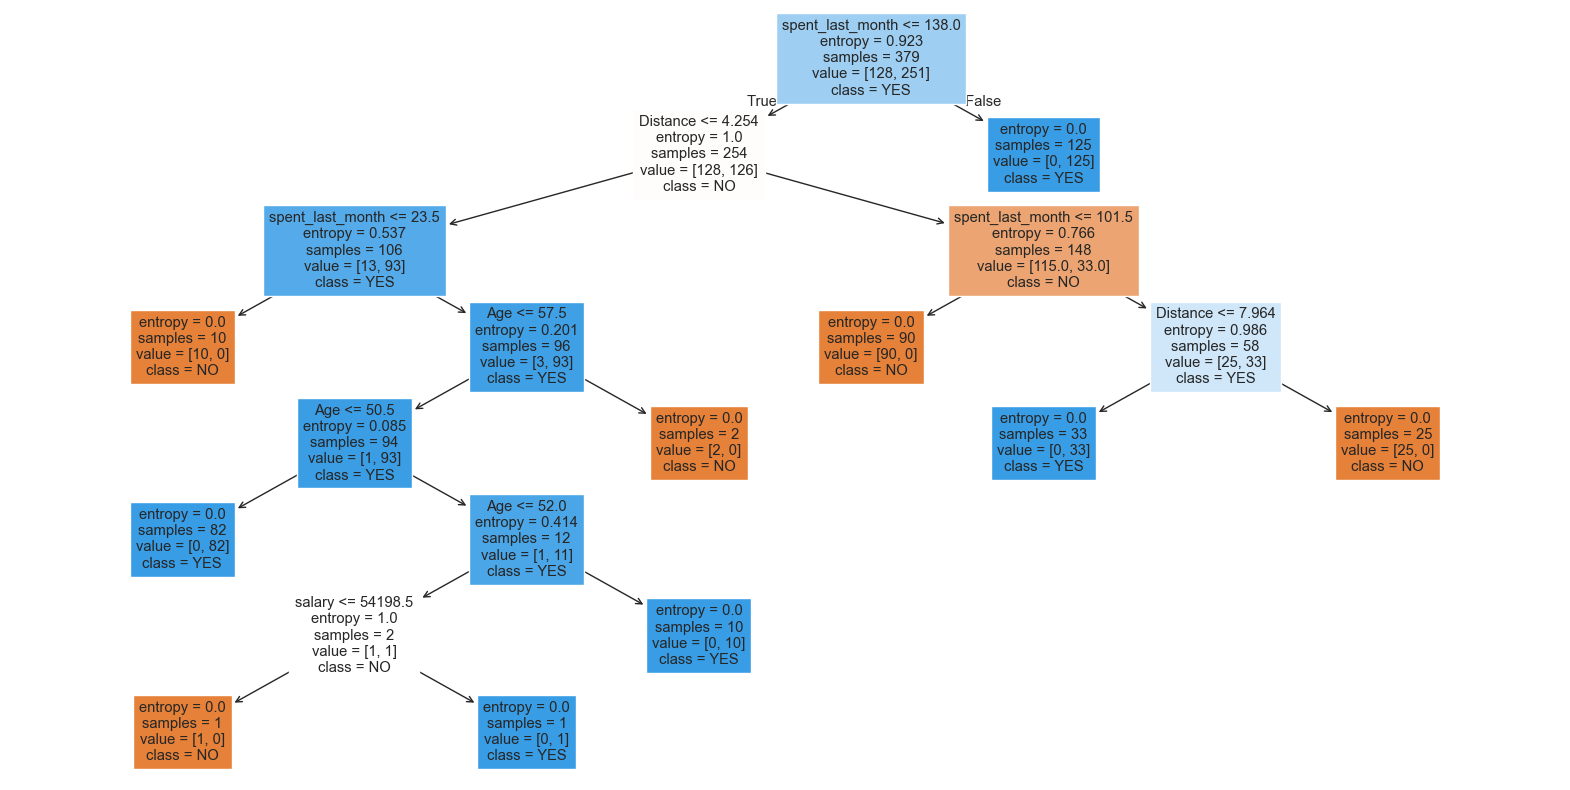

In [122]:
# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the size of the figure

#plot the decision tree using the trained model 
plot_tree(entr_model, feature_names=X_train.columns, class_names=entr_model.classes_, filled=True)


plt.show()


## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [123]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9263157894736842
Balanced accuracy: 0.9206171735241502
Precision score for "Yes" 0.8947368421052632
Precision score for "No" 0.9736842105263158
Recall score for "Yes" 0.9807692307692307
Recall score for "No" 0.8604651162790697


What can you infer from these results? Write your conclusions here:

Based on the metrics provided by my model it appears to be very accurate....a little to accurate.....suspiciously accurate. This leads me to conclude that my model might be overfitting.

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [124]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion='gini',random_state=123)
# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)

# Turn y_pred into a series, as before
y_pred_series = pd.Series(y_pred)

# Check out gini_model
gini_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 123,
 'splitter': 'best'}

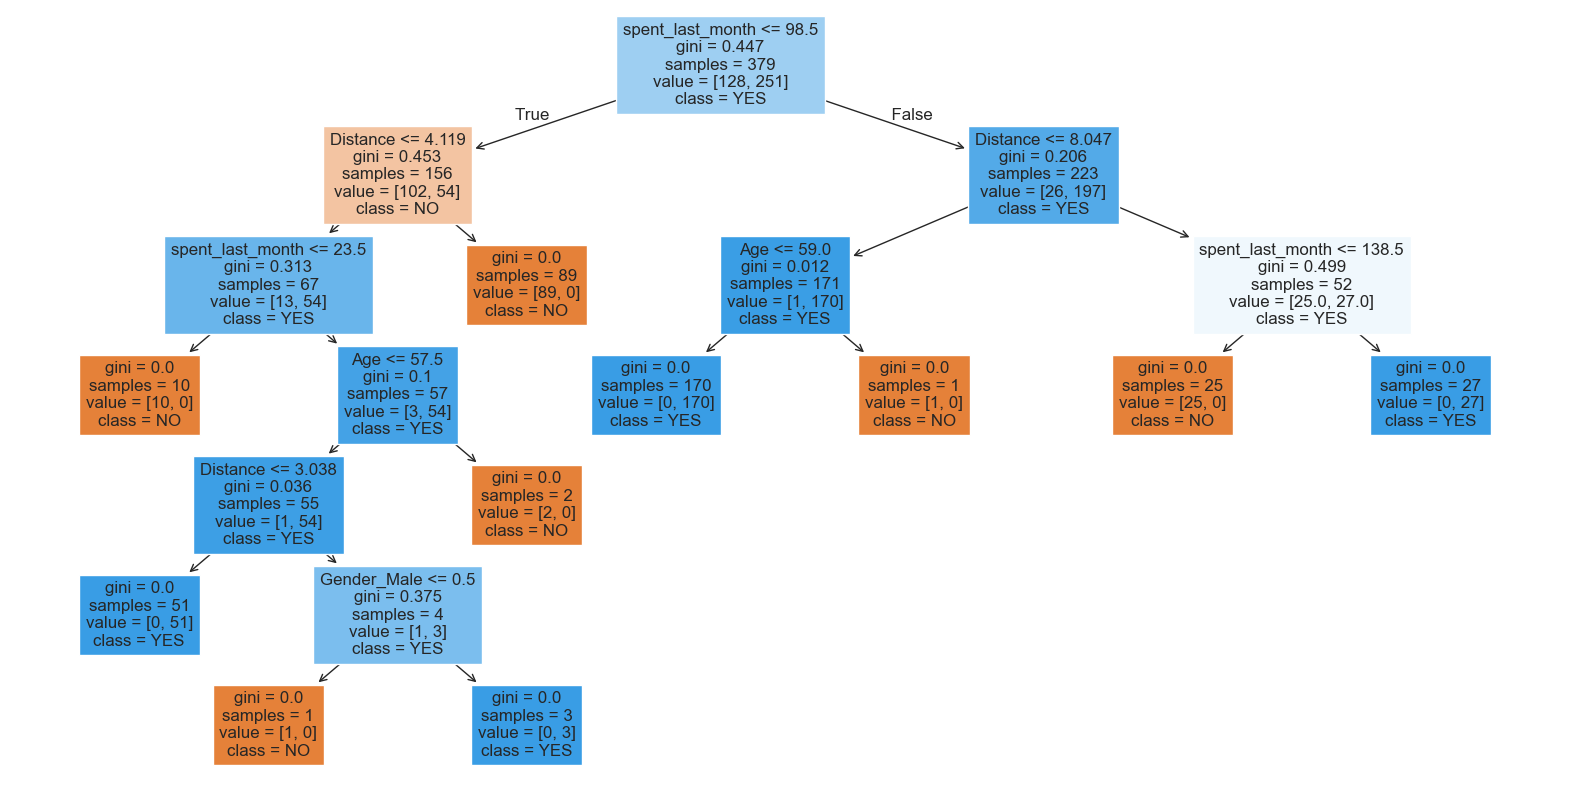

In [125]:
# Gini_model Visualization 

# Plot the decision tree

plt.figure(figsize=(20,10))  # Set the size of the figure
plot_tree(gini_model, feature_names=X_train.columns, class_names=gini_model.classes_, filled=True)
plt.show()
# Alternatively for class_names use gini_model.classes_
plt.show()

In [127]:
# Model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9368421052631579
Balanced accuracy: 0.9302325581395349
Precision score 0.896551724137931
Recall score 0.8604651162790697


Comparing Results from entr model:

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561

Comparing to the previous model. These are lower metrics compared to the last model however it is still very accurate and the deeper the leaf nodes the more purity there is suggesting that it might still be overfitting the data. 

## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

I will start with picking 3, and see how that goes. 

In [128]:
#  entr_model2 with the max_depth parameter equal to 3. 



entr_model2 = tree.DecisionTreeClassifier( criterion='entropy',max_depth=3,random_state=123)
# Using fit() on the gini_model to fit model. 
entr_model2.fit(X_train, y_train)

# Calling predict() on the gini_model  
y_pred = entr_model2.predict(X_test)

# Turning y_pred into a series
y_pred_series = pd.Series(y_pred)

# Getting parameters of model 
entr_model2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 123,
 'splitter': 'best'}

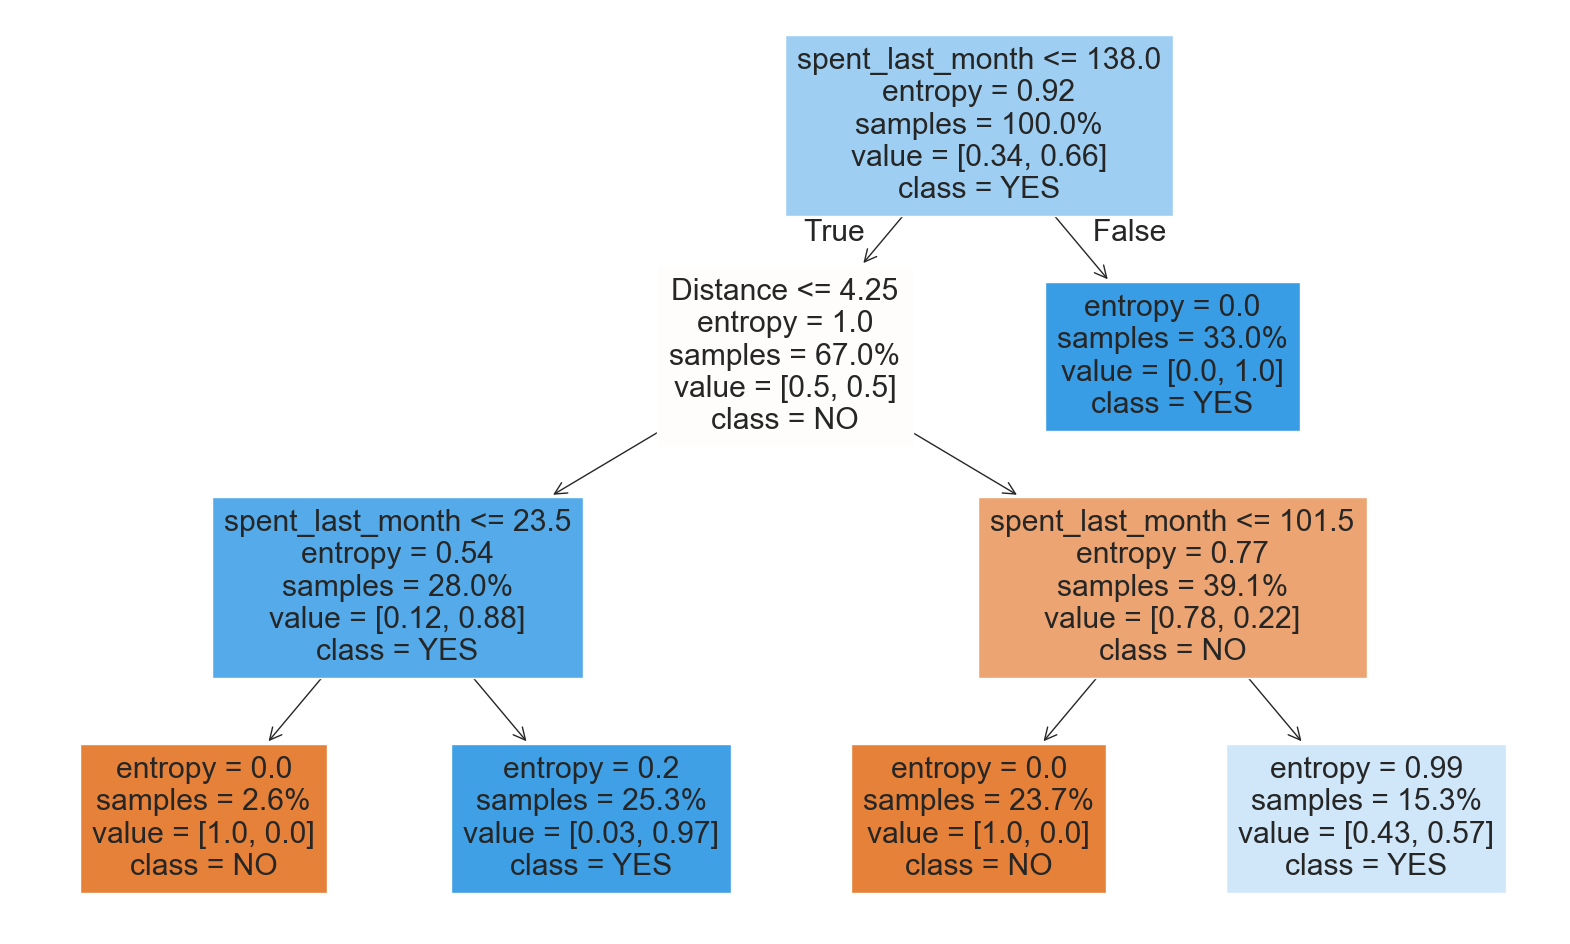

In [129]:
# visualize the tree to grasp its nature


plt.figure(figsize=(20,12))  # Set the size of the figure
plot_tree(entr_model2, feature_names=X_train.columns, class_names=entr_model2.classes_, filled=True, proportion= True, precision=2) #Here proportion= True will lead to node size being proportional to number of samples


plt.show()

# Alternatively for class_names use entr_model2.classes_


In [130]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.8631578947368421
Balanced accuracy: 0.8488372093023255
Precision score for "Yes" 0.8
Recall score for "No" 0.6976744186046512


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? 

## Observations:

Although accuracy decresased I do not think that this an inferior model as I suspect the first entropy model was overfitting to the data. Providing the argument max_depth=3 lead to the tree having less branches which helps to reduce overfitting. I think entr_model2 might be better at generalizing and less prone to overfitting compared to entr_model. 

## Model 4: Gini impurity  model - max depth 3
Same method with the Gini impurity model. 

In [131]:
# gini_model2 max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion ='gini', max_depth  = 3, random_state=123 )

# Predict and series transformations as before. 
gini_model2.fit(X_train, y_train)

# Turn y_pred into a series.
y_pred_series = pd.Series(y_pred)

# Check out entr_model2
gini_model2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 123,
 'splitter': 'best'}

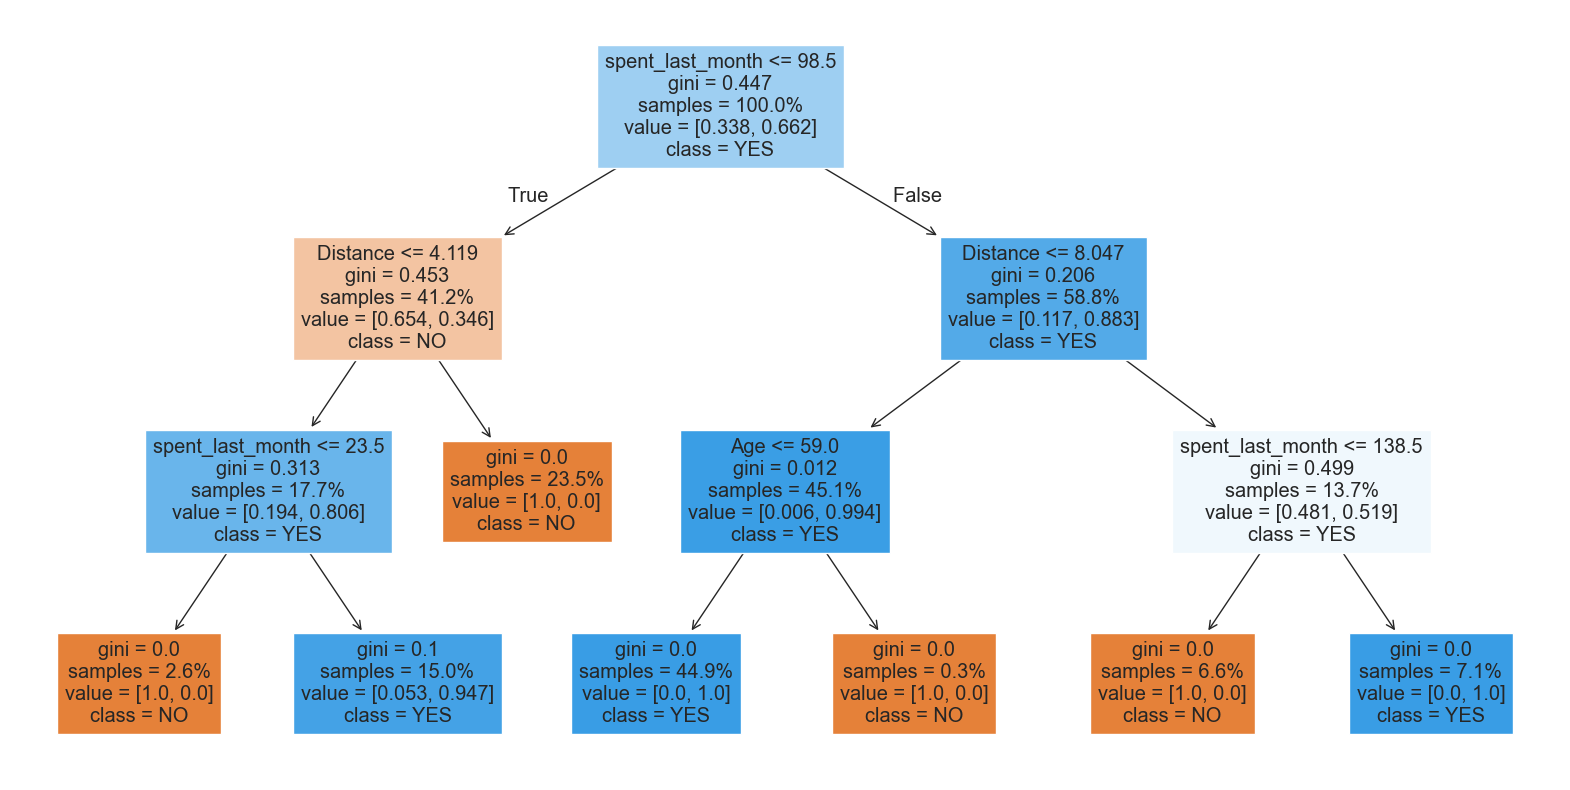

In [132]:


# Plot the decision tree

plt.figure(figsize=(20,10))  # Set the size of the figure
plot_tree(gini_model2, feature_names=X_train.columns, class_names=gini_model2.classes_, filled=True, proportion=True, precision=3 )


plt.show()

# Alternatively for class_names use gini_model2.classes_


In [133]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.8631578947368421
Balanced accuracy: 0.8488372093023255
Precision score 0.8
Recall score 0.6976744186046512


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 

This is the best model we have produced so far because it has a good balance between precision and recall. It also has a max depth of 3 which helps to reduce overfitting however it has a Recall score of 73% indicating that some positive cases are being misidentified. The balance score suggests that the model is performing well across all classes and not overly biased toward one class. Precision score of 87% suggest that model has few instances of wrongly classiying as positive. 

# 4. Evaluating and concluding
## 4a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [134]:
# Call value_counts() on the 'Decision' column of the original coffeeData
RRcoffee['Decision'].value_counts()

Decision
YES    303
NO     171
Name: count, dtype: int64

In [135]:
Prediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision',
       'spending_category_by_month'],
      dtype='object')

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [136]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feature_cols = ['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online']

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X =  Prediction[feature_cols]

In [145]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X_encoded = pd.get_dummies(new_X, columns=['Gender'], drop_first=True)

# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyers = gini_model2.predict(new_X_encoded)

In [146]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
print(np.unique(potential_buyers, return_counts=True))

(array(['NO', 'YES'], dtype=object), array([ 44, 184]))


In [147]:


# Get the unique values ('YES' and 'NO') and their counts in potential_buyers
unique_values, counts = np.unique(potential_buyers, return_counts=True)

# Directly print the unique values and counts
print(dict(zip(unique_values, counts)))


{'NO': 44, 'YES': 184}


The total number of potential buyers is 303 + 183 = 486

In [149]:
# Print the total number of surveyed people 
Total_surveyed = len(RRcoffee['Decision'])
print(Total_surveyed)

702


In [151]:
# Let's calculate the proportion of buyers
propotion_buyers = 486/Total_surveyed

print(propotion_buyers)

0.6923076923076923


In [142]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
print('The percent of people who want to buy Hidden Farm coffee, by our model is',propotion_buyers*100, '%')

The percent of people who want to buy Hidden Farm coffee, by our model is 69.23076923076923 %


## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 5a. Import necessary modules

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### 5b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [153]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(random_state=123)

# Model and fit
firstRFModel.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [154]:
# Make prediction

y_pred = firstRFModel.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9473684210526315


In [157]:
print("Random Forest model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Random Forest model
Accuracy: 0.9473684210526315
Balanced accuracy: 0.9418604651162791
Precision score 0.9122807017543859
Recall score 0.8837209302325582


In [158]:
# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyersRF = firstRFModel.predict(new_X_encoded)

In [159]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
print(np.unique(potential_buyersRF, return_counts=True))

(array(['NO', 'YES'], dtype=object), array([ 37, 191]))


In [160]:
#Predicted YES is 186 now compared to 183 in Model 4. 

# Let's calculate the proportion of buyers 303 + 186
propotion_buyersRF = 489/Total_surveyed

print(propotion_buyersRF)

0.6965811965811965


In [161]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
print('The percent of people who want to buy Hidden Farm coffee, by our model is',propotion_buyersRF*100, '%')

The percent of people who want to buy Hidden Farm coffee, by our model is 69.65811965811966 %


## Comparing metrics of all 5 models

# Model Entropy - no max depth
## Accuracy: 0.9915966386554622
## Balanced accuracy: 0.9878048780487805
## Precision score for "Yes" 0.9873417721518988
## Precision score for "No" 1.0
## Recall score for "Yes" 1.0
## Recall score for "No" 0.975609756097561

# Model Gini impurity model
## Accuracy: 0.9831932773109243
## Balanced accuracy: 0.9813946216385241
## Precision score 0.9871794871794872
## Recall score 0.975609756097561

# Model Entropy model max depth 3
## Accuracy: 0.907563025210084
## Balanced accuracy: 0.8658536585365854
## Precision score for "Yes" 0.8764044943820225
## Recall score for "No" 0.7317073170731707

# Gini impurity  model - max depth 3
## Accuracy: 0.907563025210084
## Balanced accuracy: 0.8658536585365854
## Precision score 0.8764044943820225
## Recall score 0.7317073170731707

# Random Forest model
## Accuracy: 0.9663865546218487
## Balanced accuracy: 0.957004377736085
## Precision score 0.9625
## Recall score 0.926829268292683

### 5c. Revise conclusion

Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree? 

## Conclusion

After executing Random Forest the results are almost the same as my best model which was model 4. While Random Forest had higher metrics and managed to classify 3 new people as YES for buying Hidden Farm Coffee. These 3 people did not change the percent by much which is still around 69.65% which falls below our threshold of 70% or above. 


## My suggestions to RR Diner Coffee based on Decision Trees and Random Forest Models. 
- Given the data I would advise RR coffee diner stake holders to not to buy coffee from Hidden Farms as the margin of error is too close for comfort and the risks are to great in this particular situation.

- Based on my findings I would also suggest that RR coffee diner increase marketing campaings with in a 3 mile radius of each diner to attrack new customers who are more likely to become loyal customers and increase sales. 

- While this deal is not the best at this moment it is something that could prove profitable if loyal customer base is increased in the future. 

- Regarless of Salary, customers who live within 3 miles were far more likely to buy new hidden farms coffee. 